https://analysisbugs.tistory.com/104

https://blog.naver.com/PostView.naver?blogId=mincheol9166&logNo=221740156045&parentCategoryNo=&categoryNo=51&viewDate=&isShowPopularPosts=true&from=search


 window 별로 "하나하나씩 따로 예측하는 것은 시간낭비 계산 낭비다" 이기 때문에 아래처럼 컨볼루션을 통해 각각의 픽셀에 대해서 한 번에 예측하는 방식을 택함.

이 아이디어의 특징은, Convolution network를 통과할 때, padding 으로 Input 사이즈를 계속 유지시킵니다. 그리고 마지막에, FC layer를 걸치지 않고, CxHxW Feature맵으로 각각의 픽셀별로 바로 예측합니다.

물론 이 방법에도 큰 문제가 존재합니다. Convolution network를 input 사이즈를 유지하면서 계속 통과시키다보면, 필요한 parameter의 수가 기하급수적으로 늘어나게 되며, memory 과부하 및 computational cost가 커지는 문제점이 발생합니다.

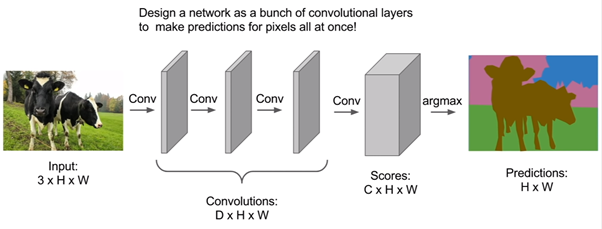

그래서 나온 아이디어가 Deconvolution 입니다. 모든 픽셀들을 한번에 예측하되, 사이즈를 안줄이면 문제점이 존재하므로, 줄였다가 다시 복원시키면 어떨까? 하는 아이디어를 현실화한 것입니다.

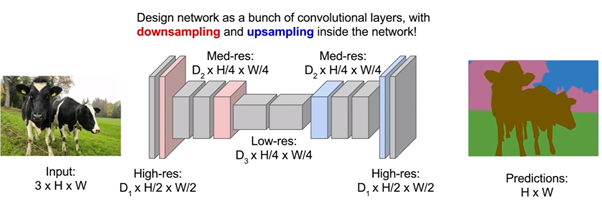

기존의 CNN과 비슷하게 Feature map 사이즈를 줄이고, 나온 결과를 FC layer에 넣는 대신 Deconvolution을 통해 원본 input 사이즈로 복원합니다. 이 때, 앞서서 축소시키는 과정과 대칭이 되게 하는 것이 좋습니다.

이렇게 해상도를 높이는 것을 upsampling이라고 부른다.

upsampling에는 2가지가 있다.

- pooling layer를 복원하는 것
- Convolution layer의 stride에 의한 축소를 복원하는 것

1. Nearest Neighbor Unpooling

    Nearest Neighbor Unpooling는 가장 간단한 방법입니다. 2x2를 4x4로 복원 시킬 때, 같은 값으로 복제하는 것 입니다.
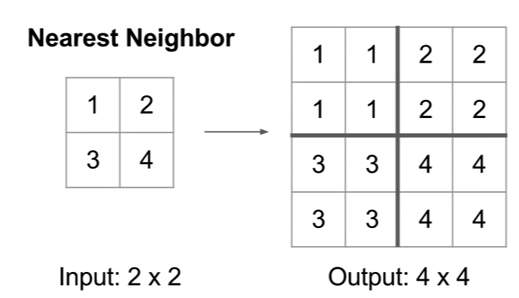


2. Bed of Nails Unpooling

    Bed of Nails Unpooling는 정해진 위치에만 값을 저장하고, 나머지는 0으로 만드는 방법입니다.

위의 경우에는 왼쪽 위에 값을 저장하고 나머지를 0으로 만들었네요.
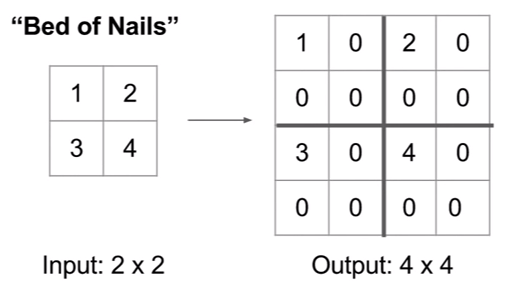

3. Max Unpooling

    Max Unpooling에서는 앞선 Max Pooling layer에 대하여, max pooling 된 위치를 기억하고, 그 위치에 값을 복원합니다.
    
    이 방법은 Bed of Nails Unpooling에 비해서 정보 손실을 방지할 수 있습니다. 물론, 별도의 메모리를 필요로하지만, CNN에서 매우 작은 비율이므로 아무런 상관이 없다고 합니다.

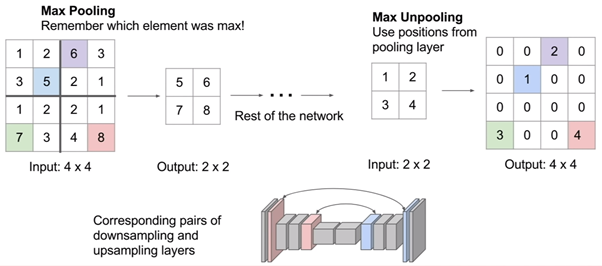

이번에는 Convolution Layer에 대한 원복을 알아보자

Transpose Convolution라고 불리고 Deconvolution라고도 불린다.

1. Transpose Convolution


    Transpose Convolution 은 행렬을 이용한 방법입니다.
    padding = 0, stride = 1 로 3x3 kernel을 4x4 input에 적용시킬 때, 행렬로 나타내면 다음과 같습니다.  (컨볼루션을 행렬 곱셉으로 표현한 모습)
    
    3x3 Kernel을 4x16 행렬로 바꾸고, input을 16x1행렬로 분해하고, 2x2 output 을 4x1로 분해하여 계산합니다.
        
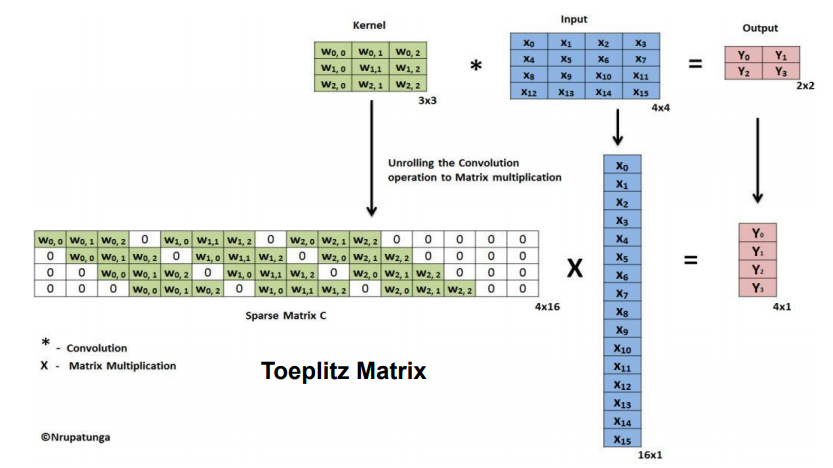


    Transpose Convolution은 4x16 행렬을 Transpose해서 Input feature map을 output으로 출력합니다.

    3x3 Kernel을 4x16 행렬로 바꾸고, input을 16x1행렬로 분해하고, 2x2 output 을 4x1로 분해하여 계산합니다.

    Transpose Convolution은 4x16 행렬을 Transpose해서 Input feature map을 output으로 출력합니다.
    
    최종적으로 Convolution layer 와 Pooling layer로 축소된 이미지가, upsampling 과정을 걸쳐서 원본 이미지의 사이즈와 같게 복원이 되고, 이 출력값으로, 한꺼번에 classification을 진행해도 계산량이 이전보다 줄어듬.

    앞선 아이디어에서 제시된 방법에서의 문제점이 다소 해결된다. (Memory 문제 감소, Computational cost 감소)

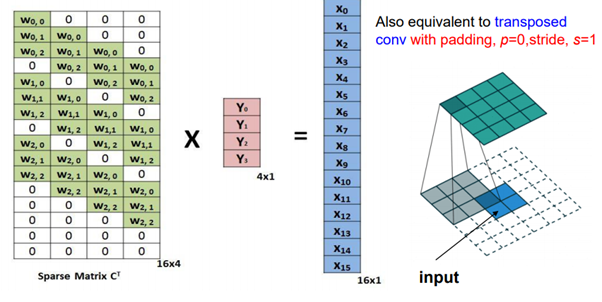